# Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread


In [ ]:
data_dir = Path('/Users/utkarsh/majorProject/TB_Chest_Radiography_Database')

data_dir

# Reading Data

In [ ]:
normal_cases_dir = data_dir / 'Normal'
Tuberculosis_cases_dir = data_dir / 'Tuberculosis'
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

train_data = []

for img in normal_cases:
    train_data.append((img,0))

for img in Tuberculosis_cases:
    train_data.append((img, 1))

train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head()

,image,label
0,../input/tuberculosis-tb-chest-xray-dataset/TB...,0
1,../input/tuberculosis-tb-chest-xray-dataset/TB...,0
2,../input/tuberculosis-tb-chest-xray-dataset/TB...,0
3,../input/tuberculosis-tb-chest-xray-dataset/TB...,0
4,../input/tuberculosis-tb-chest-xray-dataset/TB...,0


In [ ]:
train_data.shape

(4200, 2)

# Counting Data

0    3500
1     700
Name: label, dtype: int64


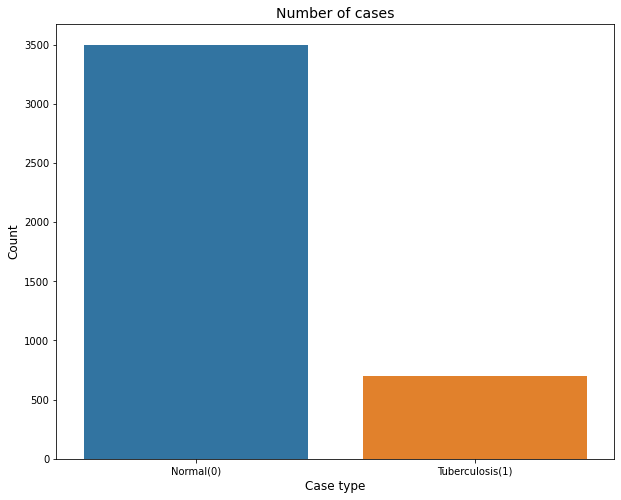

In [ ]:
cases_count = train_data['label'].value_counts()
print(cases_count)

plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

# Visualising Dataset

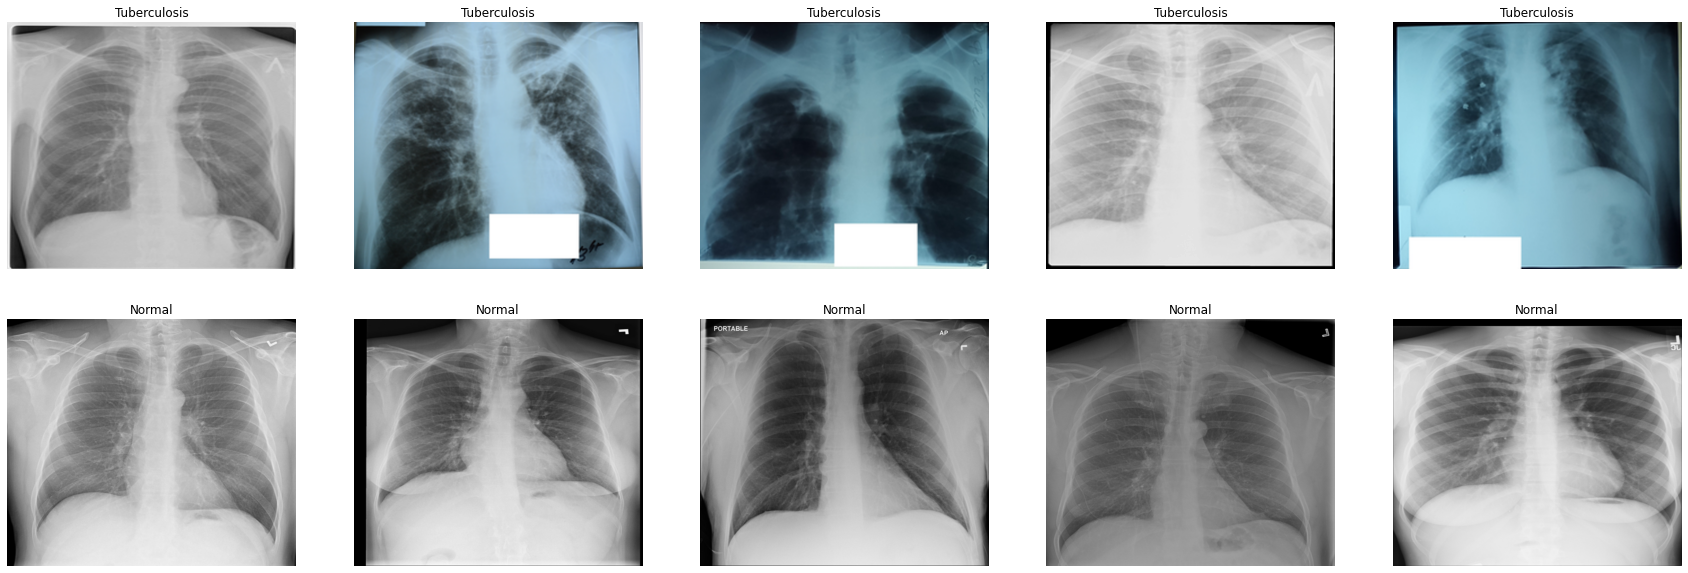

In [ ]:

Tuberculosis_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

samples = Tuberculosis_samples + normal_samples
del Tuberculosis_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Tuberculosis")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

# Converting Data

In [ ]:
from tqdm import tqdm
train_normal = data_dir / 'Normal'
train_Tuberculosis = data_dir / 'Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases =Tuberculosis_cases_dir.glob('*.png')
train_data = []
train_labels = []
from keras.utils.np_utils import to_categorical



for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)
                        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)
    

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

3500it [01:02, 55.90it/s]
700it [00:10, 65.18it/s]


Total number of validation examples:  (4200, 28, 28, 3)
Total number of labels: (4200,)


In [ ]:
train_data1[1]

array([[[0.05098039, 0.05098039, 0.05098039],
        [0.04313725, 0.04313725, 0.04313725],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.04705882, 0.04705882, 0.04705882],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.04313725, 0.04313725, 0.04313725],
        [0.03921569, 0.03921569, 0.03921569],
        [0.04313725, 0.04313725, 0.04313725]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.03921569, 0.03921569, 0.03921569],
        [0.04313725, 0.04313725, 0.04313725],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.04313725, 0.04313725, 0.04313725]],

       ...,

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0

In [ ]:
train_labels1.shape

(4200,)

In [ ]:
train_data1.shape

(4200, 28, 28, 3)

In [ ]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [ ]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1['label'].unique()

array([0, 1])

# Resampling Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    3500
1    3500
Name: label, dtype: int64


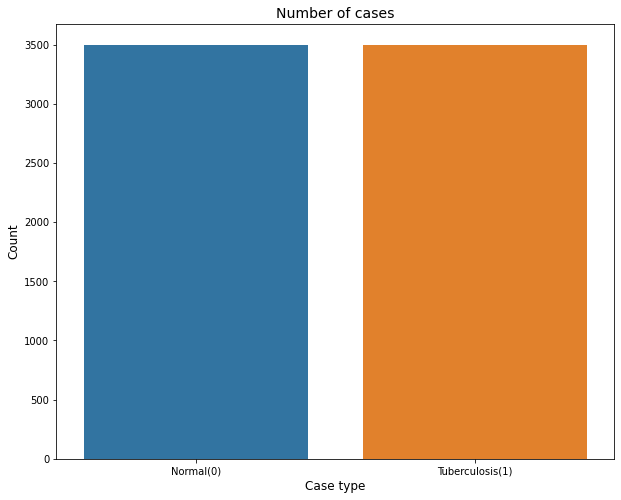

In [ ]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

In [ ]:
train_data2.shape

(7000, 2352)

In [ ]:
train_labels2.shape

(7000, 1)

In [ ]:
train_labels2

,label
0,0
1,0
2,0
3,0
4,0
...,...
6995,1
6996,1
6997,1
6998,1


In [ ]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.15, random_state=42)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

# Creating Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 53,904
Trainable params: 53,904
Non-trainable params: 0
__________________________________________________

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)              

# Training

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/10


186/186 [==============================] - 38s 125ms/step - loss: 0.6685 - accuracy: 0.5467 - val_loss: 0.4917 - val_accuracy: 0.8019
Epoch 2/10
186/186 [==============================] - 23s 123ms/step - loss: 0.3645 - accuracy: 0.8528 - val_loss: 0.2578 - val_accuracy: 0.9067
Epoch 3/10
186/186 [==============================] - 22s 119ms/step - loss: 0.2942 - accuracy: 0.8839 - val_loss: 0.2255 - val_accuracy: 0.9219
Epoch 4/10
186/186 [==============================] - 22s 119ms/step - loss: 0.2897 - accuracy: 0.8847 - val_loss: 0.2196 - val_accuracy: 0.9210
Epoch 5/10
186/186 [==============================] - 23s 124ms/step - loss: 0.2637 - accuracy: 0.8939 - val_loss: 0.2730 - val_accuracy: 0.8819
Epoch 6/10
186/186 [==============================] - 23s 123ms/step - loss: 0.2529 - accuracy: 0.8995 - val_loss: 0.1920 - val_accuracy: 0.9295
Epoch 7/10
186/186 [==============================] - 24s 128ms/step - loss: 0.2341 - accuracy: 0.9118 - val_loss: 0.2026 - val_accuracy: 0.9

In [ ]:
train_labels2['label'].unique()

array([0, 1])

In [ ]:
test_data = []
image='../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-101.png'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [ ]:
test_data1.shape

(1, 28, 28, 3)

In [ ]:
a=model.predict(np.array(test_data1))
a

array([[-3.1502032,  1.9237326]], dtype=float32)

In [ ]:
np.argmax(a)

1

In [ ]:
model.save('classificationModel')

# Loading and Checking Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
model = tf.keras.models.load_model('/Users/utkarsh/majorProject/finalModels/classificationNormal')

In [29]:
test_data = []
image='/Users/utkarsh/majorProject/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-19.png'
img = cv2.imread(str(image))
img2= cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)
a=model.predict(np.array(test_data1))
print(a)
if(np.argmax(a)):
    print('Tuberculosis')
else : print('Normal')

1/1 [==============================] - 0s 127ms/step
[[-3.1596127  1.9352287]]
Tuberculosis
